# Assignment Python 1

oleh Robi Dwiputra Satria

PYTN-KS09-024

Studi Independen - Kampus Merdeka

---
## Project Overview

Tujuan dari Assignment 1 ini adalah untuk memperkenalkan pada visualisasi data dengan Python sekonsisten mungkin. Menggunakan apa yang telah dipelajari; unduh Kumpulan Data Kejahatan London dari Kaggle. Dataset ini merupakan catatan kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. 


> Merumuskan pertanyaan dan mendapatkan uji hipotesis statistik untuk menjawab pertanyaan tersebut dengan membuat keputusan menggunakan data secara ilmiah, dan memvisualisasikan data tersebut. 

---
## Import Library

In [1]:
# useful for data processing
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# for plotting data 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

# for converting images into arrays and generating word cloud images
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS

# for visualizing data on an interactive Leaflet map
import folium
from folium import plugins

In [2]:
print('Libraries are already imported!')

Libraries are already imported!


---
##  Dataset

### Deskripsi singkat dataset

Dataset ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA , dan kategori utama/minor dari Jan 2008-Des 2016.

### Nama kolom di dataset

dataset berisi:

- lsoa_code: kode area kepolisian
- borough: area administrasi wilayah di kota london 
- major_category: kategori kejahatan utama
- minor_category: kategori kejahatan minor
- value: jumlah terjadinya kejahatan pada wilayah tertentu, dalam bulan tertentu
- year: ringkasan statistik dalam tahun
- month: ringkasan statistik dalam bulan

### Import Dataset

Dataset _London Crime LSOA_ dalam rentang Januari 2008 - Desember 2016, dapat diakses pada [link](https://www.kaggle.com/datasets/jboysen/london-crime) berikut ini.

In [3]:
df_lsoa = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df_lsoa.head() # menampilkan 5 baris pertama

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


---
## Preproses dataset sebelum visualisasi data

Hal yang dilakukan pada tahap preproses ini adalah: <br>
1. Mengubah semua nama kolom menjadi Bahasa Indonesia sesuai dengan keterangan pada setiap kolom. Hal ini dilakukan 
untuk memudahkan proses pemrograman.
2. Mengenali data dengan mengetahui dimensi (baris, kolom) dari dataset dan fitur/atribut/kolom yang terdapat pada dataset.
3. Mengetahui apakah tipe data sudah sesuai dengan masing-masing kolom.
4. Mengetahui standard missing values yang terdapat pada dataset, yang meliputi:
<br> - _Standard Missing Values_
<br> - _Non-Standard Missing Values_
<br> - _Unexpected Missing Values_
<br> - _Summarizing Missing Values_
5. Menangani missing values (jika ada) dengan mengisinya menggunakan nilai median dari kolom yang terdapat missing values.

---
## Mengenal dan preproses dataset

In [5]:
### Menampilkan 3 baris pertama dataset
df_lsoa.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


### Mengubah nama pada setiap kolom

In [6]:
df_lsoa.rename(
    columns = {'lsoa_code' : 'kode_area',
               'borough' : 'wilayah', 
               'major_category' : 'kejahatan_mayor',
               'minor_category' : 'kejahatan_minor',
               'value' : 'jumlah_kasus',
               'year' : 'tahun',
               'month' : 'bulan'}, 
    inplace = True)

In [7]:
df_lsoa.head(3)

,kode_area,wilayah,kejahatan_mayor,kejahatan_minor,jumlah_kasus,tahun,bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


### Mengetahui dimensi (baris, kolom) dari dataset

In [8]:
baris, kolom = df_lsoa.shape
print(baris, 'baris')
print(kolom, 'kolom')

13490604 baris
7 kolom


### Menampilkan ringkasan data

In [9]:
# menampilkan daftar fitur/atribut/kolom yang terdapat pada dataset
column_list = df_lsoa.columns
print(column_list)

Index(['kode_area', 'wilayah', 'kejahatan_mayor', 'kejahatan_minor',
       'jumlah_kasus', 'tahun', 'bulan'],
      dtype='object')


In [10]:
# Menampilkan statistika deskriptif berdasarkan tipe data numerik
df_lsoa.describe()

,jumlah_kasus,tahun,bulan
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
# Menampilkan statistika deskriptif berdasarkan tipe data objek
df_lsoa.describe(include = 'O')

,kode_area,wilayah,kejahatan_mayor,kejahatan_minor
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


## Mengatasi _missing values_  pada dataset

### Mengetahui Standard Missing Values dan Non-Standard Missing Values

Melakukan preproses dataset dengan mengenali dan mengubah Non-Standard Missing Values (jika ada) menjadi bentuk **Standard Missing Values**.

In [12]:
# mengumpulkan missing values dalam suatu list pada parameter missing_values
missing_values = ['n/a', 'NA', '--', 'na']

In [13]:
# mengecek standard missing values dan non-standard missing values pada setiap kolom
for i in column_list:
    print('Jumlah Standard Missing Values pada kolom {} adalah {}'.format(
    i, df_lsoa[i].isnull().sum()))

Jumlah Standard Missing Values pada kolom kode_area adalah 0
Jumlah Standard Missing Values pada kolom wilayah adalah 0
Jumlah Standard Missing Values pada kolom kejahatan_mayor adalah 0
Jumlah Standard Missing Values pada kolom kejahatan_minor adalah 0
Jumlah Standard Missing Values pada kolom jumlah_kasus adalah 0
Jumlah Standard Missing Values pada kolom tahun adalah 0
Jumlah Standard Missing Values pada kolom bulan adalah 0


**Analisis:** Tidak terdapat _standard missing values_ maupun _non-standard missing values_ pada dataset

### Mengetahui Unexpected Missing Values

Melakukan preproses dataset dengan melihat **kesesuaian** antara kolom dengan tipe data yang dimuat pada setiap kolom

In [14]:
# melihat tipe data untuk setiap kolom
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   kode_area        object
 1   wilayah          object
 2   kejahatan_mayor  object
 3   kejahatan_minor  object
 4   jumlah_kasus     int64 
 5   tahun            int64 
 6   bulan            int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [15]:
# Mengetahui jumlah nilai unik setiap kolom

for i in df_lsoa.columns:
    print('Jumlah nilai unik untuk kolom {} bernilai {} \n nilai unik = {}'.format
          (i, len(df_lsoa[i].unique()), df_lsoa[i].unique()))
    print('===============================================================\n')

Jumlah nilai unik untuk kolom kode_area bernilai 4835 
 nilai unik = ['E01001116' 'E01001646' 'E01000677' ... 'E01001562' 'E01002598'
 'E01001111']

Jumlah nilai unik untuk kolom wilayah bernilai 33 
 nilai unik = ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']

Jumlah nilai unik untuk kolom kejahatan_mayor bernilai 9 
 nilai unik = ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']

Jumlah nilai unik untuk kolom kejahatan_minor bernilai 32 
 nilai unik = ['Burglary in Other Buildings' 'O

**Analisis:** Tidak terdapat _unexpected missing values_, karena setiap data sudah sesuai untuk setiap kolomnya, tipe data string (str) digunakan untuk kolom [**kode_area, wilayah, kejahatan_mayor, kejahatan_minor**] dan tipe data integer (int) digunakan untuk kolom [**jumlah_kasus, tahun, bulan**].

### Summarizing Missing Values

In [16]:
# mengetahui jumlah keseluruhan missing values 

print('Jumlah missing values =', 
      df_lsoa.isnull().sum().sum())

Jumlah missing values = 0


---
## Membuat DataFrame baru sesuai kebutuhan

### DataFrame untuk melihat total kasus kejahatan pada setiap wilayah untuk setiap tahun

In [17]:
data = {}
# mengubah atribut tahun menjadi bentuk list tahun
years = list(map(int,np.sort(df_lsoa['tahun'].unique())))
# memanggil seluruh data fitur tahun, grouping berdasarkan 'wilayah' dan dijumlahkan berdasarkan 'jumlah kasus'
for year in years:
    wilayah_thn = df_lsoa[df_lsoa['tahun'] == year].groupby("wilayah")["jumlah_kasus"].sum()
    
    # membuat series untuk mengisi data (jumlah kasus) pada DataFrame
    data[year] = pd.Series(data=map(int, wilayah_thn.reset_index()
                                    ['jumlah_kasus'].values), 
                                index = wilayah_thn.index)

# Membuat dataframe dengan 'wilayah' sebagai index dan 'years' sebagai columns
df_borough_year = pd.DataFrame(data=data,
                                 index=list(df_lsoa['wilayah'].unique()),
                                 columns=years)

# menambahkan kolom baru 'total' yang memuat jumlah total terjadinya kejahatan pada wilayah tertentu
df_borough_year['total'] = df_borough_year[years].sum(axis=1)
# mengurutkan index dari yang terbesar berdasarkan jumlah total kejahatan
df_borough_year.sort_values(by='total', ascending = False, inplace = True)

In [18]:
df_borough_year.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


### DataFrame untuk melihat total kasus kejahatan mayor setiap tahun

In [19]:
data = {}
# mengubah atribut tahun menjadi bentuk list tahun
years = list(map(int,np.sort(df_lsoa['tahun'].unique())))
# memanggil seluruh data fitur tahun, grouping berdasarkan 'kejahatan mayor' dan dijumlahkan berdasarkan 'jumlah kasus'
for year in years:
    major_crime_year = df_lsoa[df_lsoa['tahun'] == year].groupby("kejahatan_mayor")["jumlah_kasus"].sum()
    
    # membuat series untuk mengisi data (jumlah kasus) pada DataFrame
    data[year] = pd.Series(data=map(int, major_crime_year.reset_index()
                                    ['jumlah_kasus'].values), 
                                index = major_crime_year.index)

# Membuat dataframe dengan 'kejahatan mayor' sebagai index dan 'years' sebagai columns
df_major_crime = pd.DataFrame(data=data,
                                 index=list(df_lsoa['kejahatan_mayor'].unique()),
                                 columns=years)

# menambahkan kolom baru 'total' yang memuat jumlah total terjadinya kejahatan mayor
df_major_crime['total'] = df_major_crime[years].sum(axis=1)
# mengurutkan index dari yang terbesar berdasarkan jumlah total kejahatan
df_major_crime.sort_values(by='total', ascending = False, inplace = True)

In [20]:
df_major_crime.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


### DataFrame untuk melihat total kasus kejahatan setiap bulan tiap tahun

In [21]:
data = {}
# mengubah atribut tahun menjadi bentuk list tahun
years = list(map(int,np.sort(df_lsoa['tahun'].unique())))
# memanggil seluruh data fitur tahun, grouping berdasarkan 'bulan' dan dijumlahkan berdasarkan jumlah kasus
for year in years:
    crime_of_year = df_lsoa[df_lsoa['tahun'] == year].groupby("bulan")["jumlah_kasus"].sum()
    
    # membuat series untuk mengisi data (jumlah kasus) pada DataFrame
    data[year] = pd.Series(data=map(int, crime_of_year.reset_index()
                                    ['jumlah_kasus'].values), 
                                index = crime_of_year.index)

# Membuat dataframe dengan 'bulan' sebagai index dan 'years' sebagai columns
df_crime_month = pd.DataFrame(data=data,
                                 index=range(1, 13, 1),
                                 columns=years)

# menambahkan kolom baru 'total' yang memuat jumlah total terjadinya kejahatan setiap bulannya
df_crime_month['total'] = df_crime_month[years].sum(axis=1)

# mengubah index 'angka' menjadi 'nama bulan'
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
dict_of_index = {}
for i in range(1, 13, 1):
    dict_of_index[i] = months_list[i-1]
df_crime_month.rename(index=dict_of_index, inplace = True)

In [22]:
df_crime_month.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
Mar,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


---
## A. Area Plot

**Question:** 
1. Bagaimana visualisasi dari 5 wilayah dengan kasus kejahatan tertinggi pada tahun 2008-2013?

**#1 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan pada setiap wilayah untuk setiap tahun dengan memanggil parameter df_borough_year <br>

In [23]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_fig_area = df_borough_year.head().drop('total', axis = 1)
# Mentranspose baris jadi kolom
df_fig_area = df_fig_area.transpose()

**#2 Visualization:**

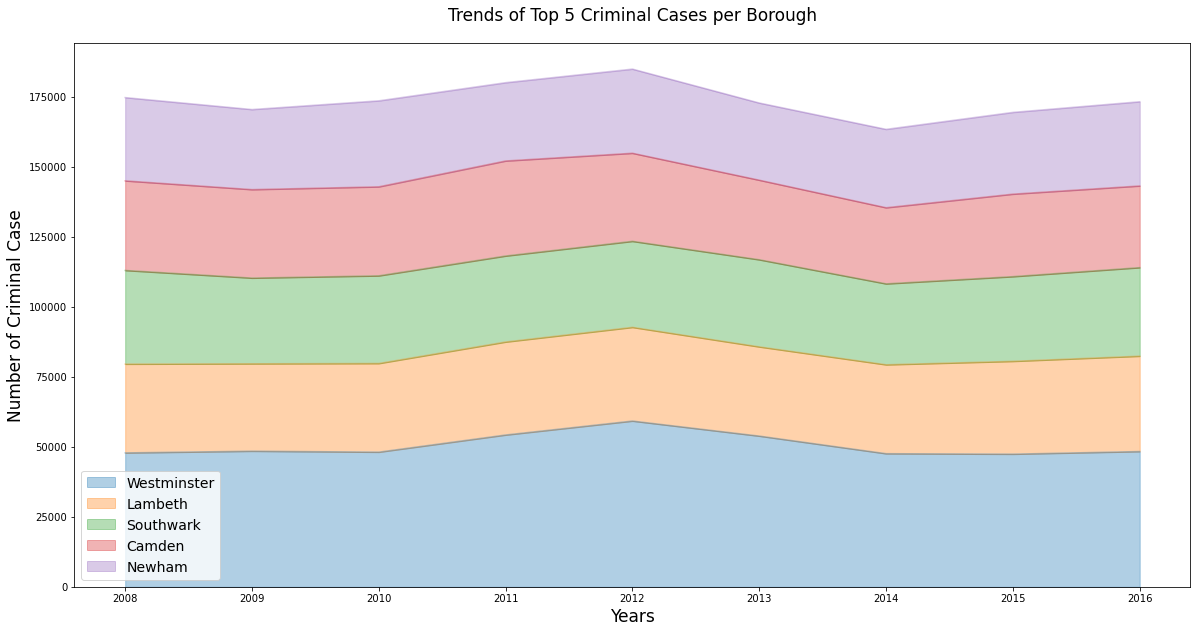

In [24]:
df_fig_area.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Trends of Top 5 Criminal Cases per Borough', fontsize = 17, y=1.03)
plt.ylabel('Number of Criminal Case', fontsize = 17)
plt.xlabel('Years', fontsize = 17)
plt.legend(loc='lower left', fontsize = 14)
plt.show()

**#3 Conlusion:**

Grafik area di atas menunjukkan visualisasi dari 5 wilayah dengan kasus kejahatan tertinggi pada tahun 2008-2013. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Kategori kejahatan Westminster menunjukkan tingkat kumulatif kasus kejahatan tertinggi pada tahun 2008-2013.
2. Jumlah total untuk Kelima kategori kejahatan utama mengalami peningkatan pada tahun 2010-2012 dan 2014-2016.
3. Jumlah total untuk Kelima kategori kejahatan utama mengalami penurunan pada tahun 2012-2014.
4. Kelima kategori kejahatan utama pada tahun 2012 merupakan jumlah kasus kejadian tertinggi untuk setiap wilayah dan tahunnya, ditandai dengan puncak tertinggi yang terletak pada tahun 2012 untuk masing-masing wilayah.

---
# B. Histogram

**#1 Question:**

1. Bagaimana distribusi frekuensi 3 kasus kejahatan tertinggi untuk setiap wilayah pada tahun 2013-2016?

**#2 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan untuk setiap tahun dengan memanggil parameter df_major_crime

In [25]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_borough_year.head()
dfps = df_borough_year.drop(columns = [2008,2009,2010,2011,2012], axis = 1)
dfps.drop(['total'], axis=1, inplace = True)
dfps2 = dfps.head(3)
df_fig_hist = dfps2.transpose()
df_fig_hist

,Westminster,Lambeth,Southwark
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


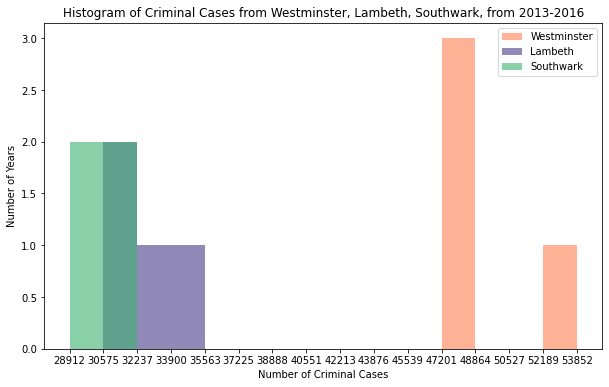

In [26]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_fig_hist, 15)

# un-stacked histogram
df_fig_hist.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Southwark, from 2013-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

**#3 Conclusion:**

Grafik Histogram di atas menunjukkan distribusi frekuensi 3 kasus kejahatan tertinggi untuk setiap wilayah pada tahun 2013-2016. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Distribusi frekuensi kasus kejahatan di wilayah Westminster cenderung menyebar jika dibandingkan dengan Lambeth dan SouthWark.
2. Kejadian kasus kejahatan di wilayah Westminster paling sering terjadi pada tahun 2013-2016, jika dibandingkan dengan Lambeth dan SouthWark.

---
# C. Bar Chart

**#1 Question:**

1. Bagaimana visualisasi dari 3 kasus kejahatan utama tertinggi pada tahun 2008-2016?

**#2 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan untuk setiap tahun dengan memanggil parameter df_major_crime

In [27]:
# menampilkan 5 baris pertama dengan kasus kejahatan tertinggi kategori kejahatan utama
df_major_crime.head()
df_major_crime_bar = df_major_crime.drop('total', axis = 1)
# mengubah kolom menjadi baris
df_major_crime_bar = df_major_crime_bar.transpose()
# menggunakan kolom ['Theft and Handling', 'Violence Against the Person', 'Burglary']
df_major_crime_bar = df_major_crime_bar.loc[:, ['Theft and Handling', 'Violence Against the Person', 'Burglary']]
df_major_crime_bar.head()

,Theft and Handling,Violence Against the Person,Burglary
2008,283692,159844,88092
2009,279492,160777,90619
2010,290924,157894,86826
2011,309292,146901,93315
2012,334054,150014,93392


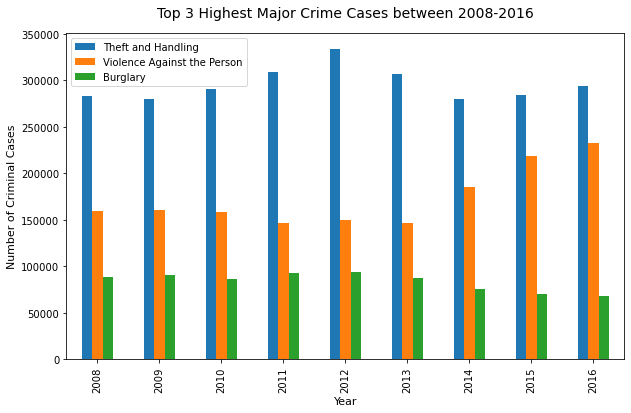

In [28]:
# step 2: plot data
df_major_crime_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year', fontsize=11) # add to x-label to the plot
plt.ylabel('Number of Criminal Cases', fontsize=11) # add y-label to the plot
plt.title('Top 3 Highest Major Crime Cases between 2008-2016', fontsize=14, y=1.03)
plt.show()

**#3 Conclusion:**

Grafik Bar chart di atas menunjukkan visualisasi dari 3 total kasus kejahatan tertinggi pada tahun 2008-2016. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Kejahatan utama kategori **Theft and Handling** merupakan kasus kejahatan tertinggi pada tahun 2008-2016, jika dibandingkan dengan kategori lainnya, seperti kejatahan **Violence Against the Person** dan **Burglary**, ditandai dengan kejahatan **Theft and Handling** memiliki selisih jangkauan yang sangat jauh jika dibandingkan kejahatan lainnya.
2. Tren peningkatan kasus kejahatan utama terjadi pada tahun 2013-2016. Sedangkan tren penurunan kasus kejahatan utama terjadi pada tahun 2012-2016.

---
# D. Pie Chart

**#1 Question:**

1. Bagaimana persentase kategori kejahatan mayor yang terjadi pada tahun 2008-2016?

**#2 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan untuk setiap tahun dengan memanggil parameter df_major_crime

In [29]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_major_crime.head()
df_fig_pie = df_major_crime['total'].value_counts

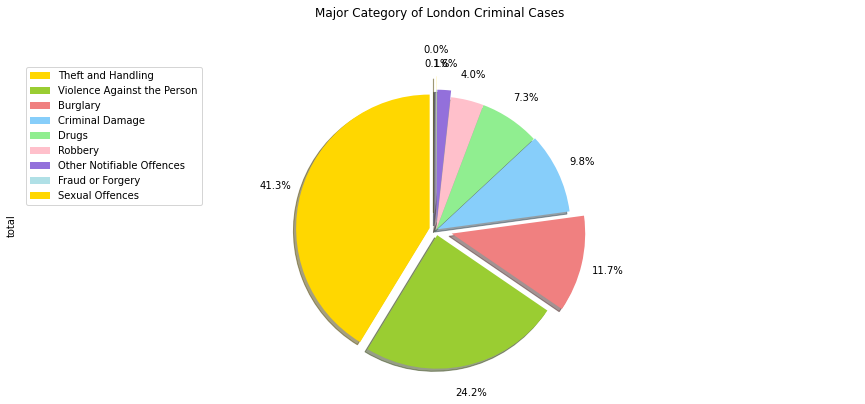

In [30]:
### type your answer here
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'mediumpurple', 'powderblue']
explode_list = [0.05, 0.04, 0.12, 0.01, 0, 0, 0.05, 0.05, 0.15] # ratio for each continent with which to offset each wedge.
df_fig_pie = df_major_crime['total']

df_fig_pie.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_fig_pie.index, loc='upper left') 

plt.show()

**#3 Conclusion:**

Grafik Pie chart di atas menunjukkan persentase kategori kejahatan mayor yang terjadi pada tahun 2008-2016. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Kejahatan **Theft and Handling** menunjukkan kasus kejahatan yang paling sering terjadi pada tahun 2008-2016, ditandai dengan persentase tertinggi bernilai **41.3%**. 

Memadukan pie chart dengan bar horizonal, agar memperoleh nilai yang lebih akurat

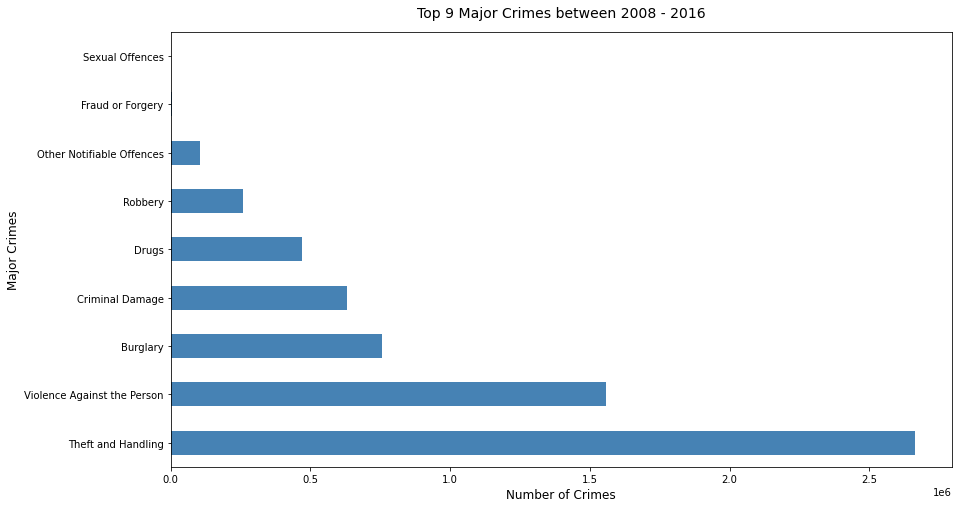

In [31]:
df_major_crime['total'].plot(kind='barh', figsize=(14, 8), color='steelblue')
plt.xlabel('Number of Crimes', fontsize = 12)
plt.ylabel('Major Crimes', fontsize = 12)
plt.title('Top 9 Major Crimes between 2008 - 2016', fontsize = 14, y = 1.02)
plt.show()

Berdasarkan grafik Horizontal bar chart, terlihat bahwa **Theft and Handling** merupakan jumlah total kasus kejahatan utama tertinggi, dan **Sexual Offences** jumlah total kasus kejahatan utama terkecil. Hal ini sesuai dengan persentase jumlah total kasus kejadian utama berdasarkan Pie Chart yang telah ditampilkan sebelumnya.

---
# E. Box Plot

**#1 Question:**

1. Bagaimana visualisasi dari distribusi frekuensi total kasus kejahatan untuk setiap wilayah pada setiap tahun?

**#2 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan pada setiap wilayah untuk setiap tahun dengan memanggil df_borough_year

In [32]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_borough_year.head()
df_fig_box = df_borough_year.drop('total', axis = 1)
df_fig_box.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


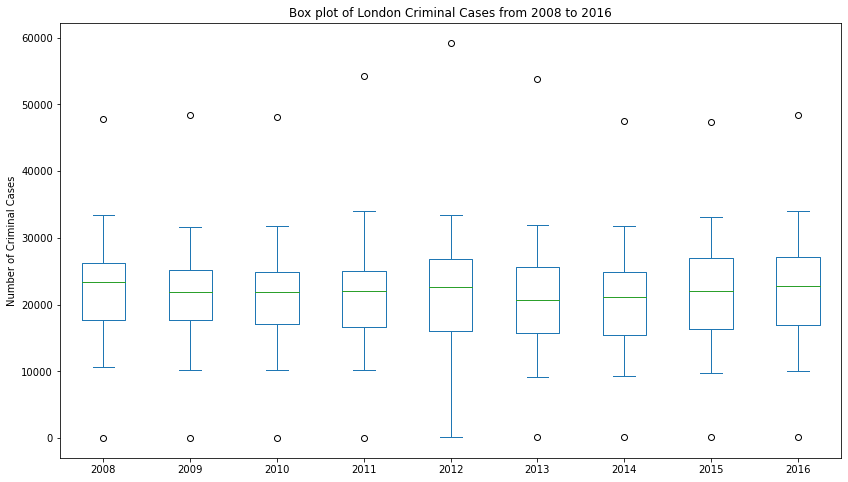

In [33]:
### type your answer here
df_fig_box.plot(kind='box', figsize=(14, 8))

plt.title('Box plot of London Criminal Cases from 2008 to 2016')
plt.ylabel('Number of Criminal Cases')

plt.show()

**#3 Conclusion:**

Grafik Box plot di atas menunjukkan visualisasi dari distribusi frekuensi total kasus kejahatan untuk setiap wilayah pada setiap tahun. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Setiap tahun memiliki rata-rata terjadinya total kasus kejahatan pada setiap wilayah berada dalam kisaran ~25.000.
2. Penyebaran kasus kejahatan cenderung sama untuk setiap tahun, namun penyebaran total kasus kejahatan pada tahun 2012 lebih tersebar jika dibandingkan tahun-tahun lainnya. total kasus kejahatan pada tahun 2012 tidak kurang dari (Q1 - (1.5 * IQR)) sehingga tidak terdapat outlier pada kisaran bawah, berbeda dengan tahun lainnya.
3. Dari sebaran di atas, terlihat bahwa setiap tahun memiliki outlier karena memiliki nilai yang sangat tinggi di atas normal keragamannya karena total kasus kejahatan setiap tahunnya lebih dari (Q3 + (1.5 * IQR)).

---
# F. Scatter Plot

**#1 Question:**

1. Bagaimana hubungan antara total kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016?

**#2 Pre-processing as needed:**

Menggunakan DataFrame untuk melihat total kasus kejahatan pada setiap bulan untuk setiap tahun dengan memanggil df_crime_month

In [34]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_crime_month.head()
#sctrp1 = df_crime_month.drop('total', axis = 1)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
Mar,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


In [35]:
df_fig_scatter = df_crime_month.copy()
df_fig_scatter.reset_index(inplace = True)
# menggunakan kolom ['total'] dan index
df_fig_scatter = df_fig_scatter.loc[:,['index', 'total']]
# mengubah nama kolom 'index' menjadi 'bulan'
df_fig_scatter = df_fig_scatter.rename(columns={'index' : 'bulan'})
df_fig_scatter

,bulan,total
0,Jan,530247
1,Feb,500537
2,Mar,551795
3,Apr,520648
4,May,552704
5,Jun,549041
6,Jul,563076
7,Agu,532784
8,Sep,522377
9,Okt,558252


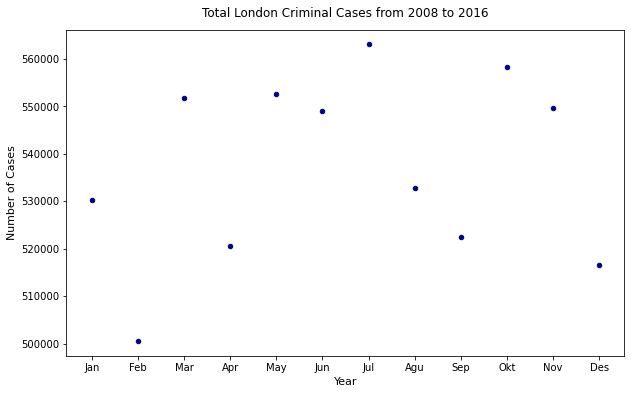

In [36]:
df_fig_scatter.plot(kind='scatter', x='bulan', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total London Criminal Cases from 2008 to 2016', y=1.02)
plt.xlabel('Year', fontsize = 11)
plt.ylabel('Number of Cases', fontsize = 11)

plt.show()

**#3 Conclusion:**

Grafik Scatter plot di atas menunjukkan hubungan antara total kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016. Berdasarkan grafik tersebut dapat disimpulkan bahwa:
1. Kasus tertinggi kejahatan berdasarkan kumulatif jumlah kasus setiap bulannya dari tahun 2008-2016 terjadi pada bulan Juli.
2. Jumlah total kasus kejahatan untuk setiap bulan tiap tahunnya memiliki perbedaan yang tidak terlalu signifikan.

---
# G. Word Cloud

**#1 Question:**

Kejahatan mayor apa yang paling sering terjadi pada tahun 2008?

**#2 Pre-processing as needed:**

In [37]:
# prepare data
df_cloud1 = df_lsoa.loc[:,['kejahatan_mayor', 'tahun']]
df_cloud = df_cloud1[df_cloud1['tahun'] == 2008]
df_cloud = df_cloud.drop('tahun', axis = 1)
df_cloud2 = df_lsoa['kejahatan_mayor']
df_cloud_str = df_cloud2.astype(str)

In [38]:
# function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

Membuat word cloud dengan masking, unduh [file mask](https://insights-on.com/wp-content/uploads/2021/03/cloud.png) 

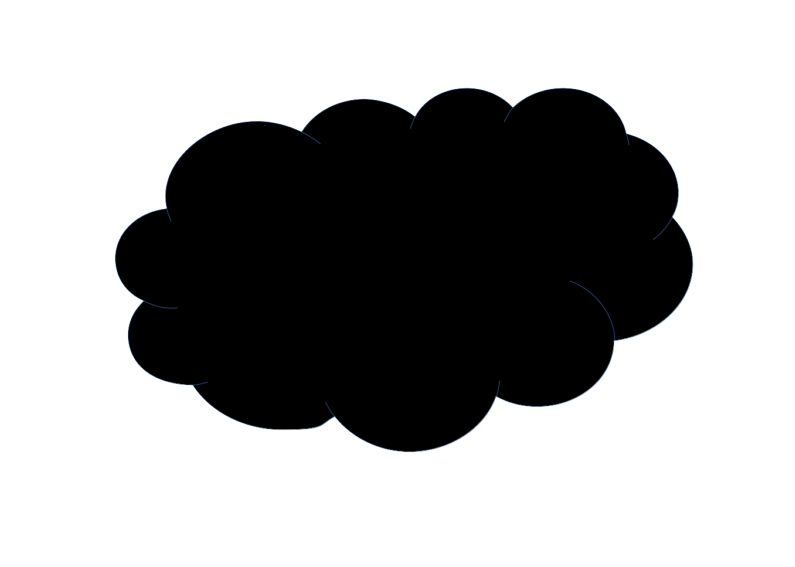

In [39]:
# save mask to shape_mask
shape_mask = np.array(Image.open('cloud_mask.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(shape_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
word_string=" ".join(df_lsoa['kejahatan_mayor'])

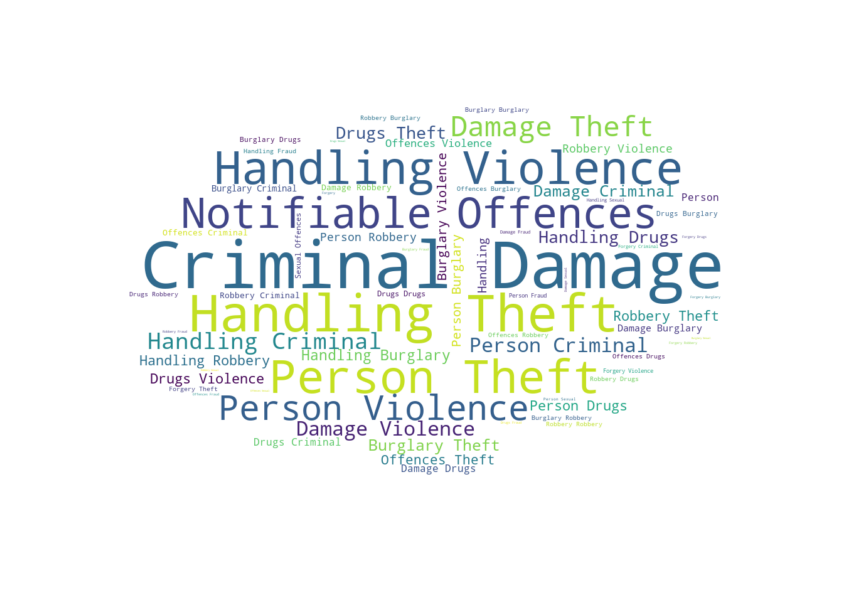

In [41]:
plt.figure(figsize=(15,15))
# instantiate a word cloud object
wc = WordCloud(background_color="white", stopwords = STOPWORDS, mask = shape_mask, max_words=2000, max_font_size= 300,  width=1600, height=800)
# generate the word cloud
wc.generate(word_string)

plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# H. Folium Maps

**#1 Question:**

Buat peta London dengan tingkat zoom 12!

**#2 Pre-processing as needed:**

In [42]:
# London latitude and longitude values
latitude = 51.507351
longitude = -0.127758

In [43]:
# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of London
london_map

---
### Overall Analysis

1. Dalam rentang tahun 2008-2016, kasus kejahatan _Theft and Handling_ paling sering terjadi, sedangkan kasus kejahatan _Sexual Offences paling jarang terjadi di London.
2. Setiap tahun memiliki rata-rata terjadinya total kasus kejahatan pada setiap wilayah berada dalam kisaran ~25.0003. 
3. Kasus tertinggi kejahatan berdasarkan kumulatif jumlah kasus setiap bulannya dari tahun 2008-2016 terjadi pada bulan Juli.